In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [7]:
air_quality = pd.read_csv("/content/drive/MyDrive/dataset/pandas_tutorial/air_quality_no2_long.csv")

air_quality = air_quality.rename(columns={'date.utc' : 'datetime'})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [8]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

# How to handle time series data with ease

In [10]:
air_quality['datetime'] = pd.to_datetime(air_quality['datetime'])
air_quality['datetime']

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

As many data sets do contain datetime information in one of the columns, pandas input function like pandas.read_csv() and pandas.read_json() can do the transformation to dates when reading the data using the parse_dates parameter with a list of the columns to read as Timestamp:

pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])

### Why are these pandas.Timestamp objects useful? Let’s illustrate the added value with some example cases.


What is the start and end date of the time series data set we are working with?

In [11]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [14]:
total = air_quality["datetime"].max() - air_quality["datetime"].min()
print(total)

44 days 23:00:00


Tambahkan Kolom bulan dari datetime ke dataset

In [18]:
air_quality['month'] = air_quality['datetime'].dt.month
air_quality.sort_values(by='datetime')

,city,country,datetime,location,parameter,value,unit,month
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,5
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³,5
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³,5
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
...,...,...,...,...,...,...,...,...
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6


What is the average NO2 concentration for each day of the week for each of the measurement locations?

In [24]:
air_quality.groupby([air_quality['datetime'].dt.weekday, air_quality['location']])[['value']].mean()

value
datetime location                     
0        BETR801             27.875000
         FR04014             24.856250
         London Westminster  23.969697
1        BETR801             22.214286
         FR04014             30.999359
         London Westminster  24.885714
2        BETR801             21.125000
         FR04014             29.165753
         London Westminster  23.460432
3        BETR801             27.500000
         FR04014             28.600690
         London Westminster  24.780142
4        BETR801             28.400000
         FR04014             31.617986
         London Westminster  26.446809
5        BETR801             33.500000
         FR04014             25.266154
         London Westminster  24.977612
6        BETR801             21.896552
         FR04014             23.274306
         London Westminster  24.859155

Plot the typical NO2 pattern during the day of our time series of all stations together. In other words, what is the average value for each hour of the day?

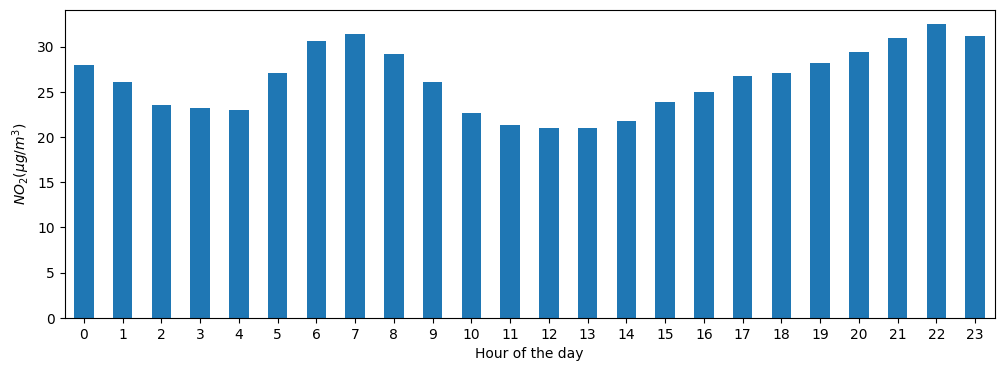

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12, 4))

air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");  # custom x label using Matplotlib

plt.ylabel("$NO_2 (µg/m^3)$");

# Datetime as index

In [27]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")

no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


Working with a datetime index (i.e. DatetimeIndex) provides powerful functionalities. For example, we do not need the dt accessor to get the time series properties, but have these properties available on the index directly:

In [28]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

Create a plot of the NO2 values in the different stations from the 20th of May till the end of 21st of May

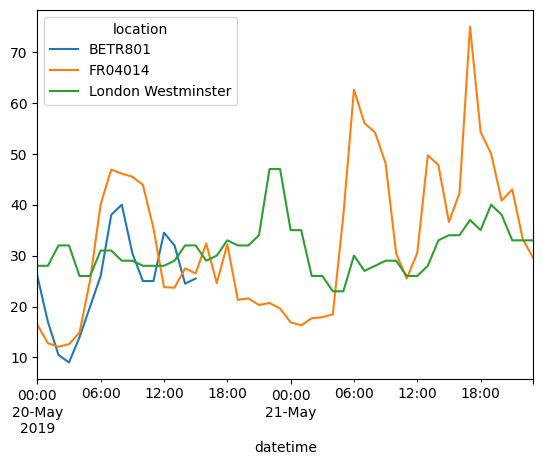

In [29]:
no_2["2019-05-20":"2019-05-21"].plot();

# Resample a time series to another frequency

Aggregate the current hourly time series values to the monthly maximum value in each of the stations.

In [31]:
monthly_max = no_2.resample("M").max()

monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [32]:
monthly_max.index.freq

<MonthEnd>

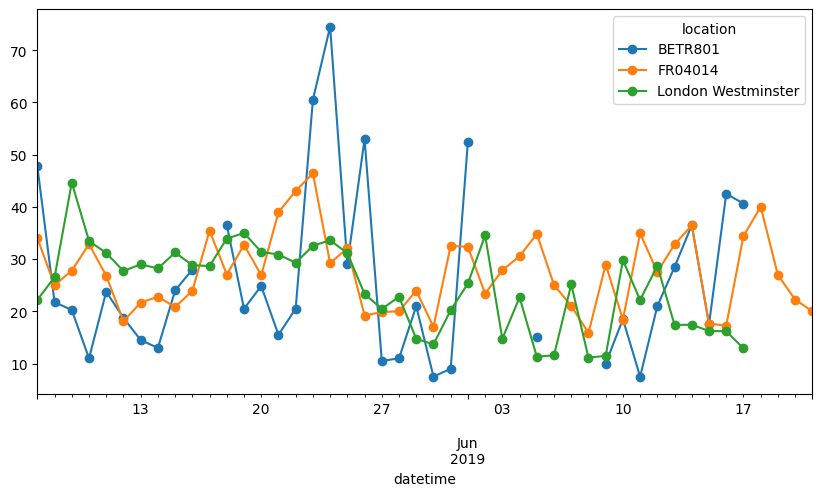

In [33]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

# How to manipulate textual data

In [2]:
import pandas as pd

In [3]:
titanic = pd.read_csv('/content/drive/MyDrive/dataset/pandas_tutorial/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Make all name characters lowercase.

In [8]:
titanic['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

Create a new column Surname that contains the surname of the passengers by extracting the part before the comma.

In [9]:
titanic["Name"].str.split(",")

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [13]:
titanic['Surname'] = titanic["Name"].str.split(",").str.get(0)
titanic[['Surname']].head()

,Surname
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen


Extract the passenger data about the countesses on board of the Titanic.

In [14]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [15]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


The string method Series.str.contains() checks for each of the values in the column Name if the string contains the word Countess and returns for each of the values True (Countess is part of the name) or False (Countess is not part of the name). This output can be used to subselect the data using conditional (boolean) indexing introduced in the subsetting of data tutorial. As there was only one countess on the Titanic, we get one row as a result.

=========================================================================

Which passenger of the Titanic has the longest name?

In [18]:
titanic['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [19]:
# cari index dari nama terbanyak
titanic['Name'].str.len().idxmax()

307

In [20]:
titanic.loc[titanic['Name'].str.len().idxmax(), 'Name']

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In the “Sex” column, replace values of “male” by “M” and values of “female” by “F”.

In [25]:
# replace value
titanic['Sex_short'] = titanic['Sex'].replace({
    'male' : 'M',
    'female' : 'F'
})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_short
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Futrelle,F
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Allen,M
